In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np


In [80]:
# there is no header, the only column is called "articles", numbers are with "," as decimal separator
articles = pd.read_csv('../data/ArticleHistory.csv', index_col=0, parse_dates=True, infer_datetime_format=True, sep=';', header=None, names=['articles'], decimal=',')
articles.head()

articles_normalized = articles / articles.max()
articles_normalized_adjusted = articles_normalized.copy()

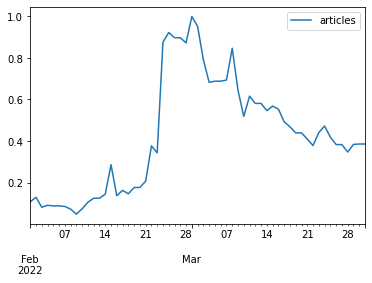

In [81]:
# at the weekend there are reduced articles, so we need to interpolate the missing values: for that isolate the weekend and replace with mean of friday and monday
for i in range(1, len(articles_normalized_adjusted.index)):
    if articles_normalized_adjusted.index[i].weekday() == 5:
        articles_normalized_adjusted.iloc[i] = (articles_normalized_adjusted.iloc[i-1] + articles_normalized_adjusted.iloc[i+2]) / 2
    if articles_normalized_adjusted.index[i].weekday() == 6:
        articles_normalized_adjusted.iloc[i] = (articles_normalized_adjusted.iloc[i-2] + articles_normalized_adjusted.iloc[i+1]) / 2
articles_normalized_adjusted.plot()

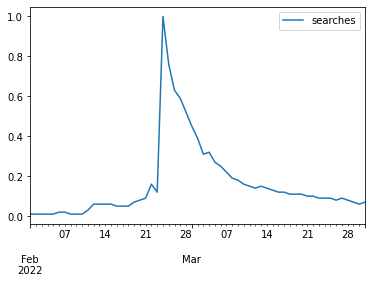

In [59]:
# there is no header, the only column is called "searches",
searches = pd.read_csv('../data/SearchHistory.csv', index_col=0, parse_dates=True, infer_datetime_format=True, sep=',', header=None, names=['searches'], decimal=',')
searches_normalized = searches / searches.max()
searches_normalized.plot()

<ipython-input-66-efdf87676c00>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  words = pd.read_csv('../data/WordHistory.csv', index_col=0, parse_dates=True , sep=',', header=None, names=['words'], date_parser=lambda x: pd.datetime.strptime(x, '%y-%m-%d'))


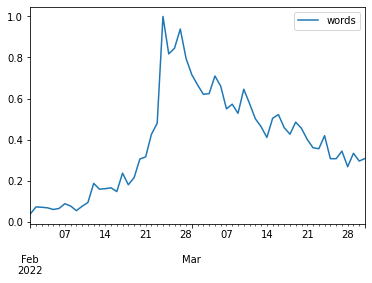

In [66]:
# format is yy-mm-dd:
words = pd.read_csv('../data/WordHistory.csv', index_col=0, parse_dates=True , sep=',', header=None, names=['words'], date_parser=lambda x: pd.datetime.strptime(x, '%y-%m-%d'))
words_normalized = words / words.max()
words_normalized.plot()

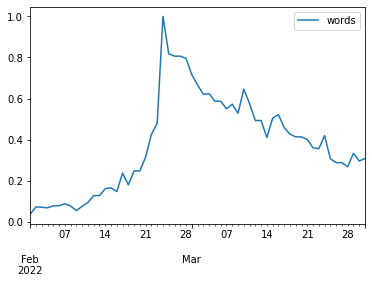

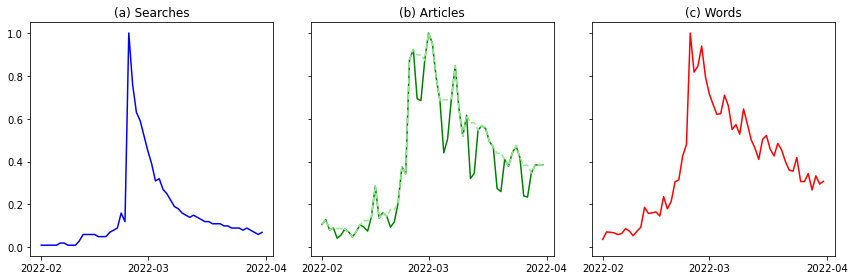

In [87]:
# plot all three normalized data sets next to each other
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
ax[0].plot(searches_normalized, color='blue')
ax[0].set_title('(a) Searches')
ax[0].xaxis.set_major_locator(mpl.dates.MonthLocator())
ax[1].plot(articles_normalized, color='green')
# plot adjusted data set in light green
ax[1].plot(articles_normalized_adjusted, linestyle='--', color='lightgreen')
ax[1].set_title('(b) Articles')
ax[1].xaxis.set_major_locator(mpl.dates.MonthLocator())
ax[2].plot(words_normalized, color='red')
ax[2].set_title('(c) Words')
ax[2].xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.tight_layout()
# save figure
plt.savefig('../plots/normalized_data.png', dpi=300)
plt.show()


In [91]:
# correlation between searches and articles
s = searches_normalized['searches'].values
a = articles_normalized_adjusted['articles'].values
w = words_normalized['words'].values
# correlation matrix
corr = np.corrcoef([s, a, w])
corr

array([[1.        , 0.8035744 , 0.85692791],
       [0.8035744 , 1.        , 0.94702938],
       [0.85692791, 0.94702938, 1.        ]])

In [ ]:
# correlation between articles and word mentions
s = searches_normalized['searches'].values
a = articles_normalized_adjusted['articles'].values
corr_s_a = np.corrcoef(s, a)[0, 1]
corr_s_a